In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")


In [3]:
 # Cell 2: Load Combined Data from .pkl files
def load_transaction_data(folder_path):
    pkl_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".pkl")])
    all_dfs = []
    for file in pkl_files:
        full_path = os.path.join(folder_path, file)
        try:
            df = pd.read_pickle(full_path)
            all_dfs.append(df)
        except Exception as e:
            print(f"❌ Failed to load {file}: {e}")
    df_all = pd.concat(all_dfs, ignore_index=True)
    df_all["TX_DATETIME"] = pd.to_datetime(df_all["TX_DATETIME"])
    df_all = df_all.sort_values("TX_DATETIME").reset_index(drop=True)
    return df_all

# Load the data
folder_path = r"C:\Users\avish\Documents\fraud_detection_project\data"
df_all = load_transaction_data(folder_path)
print("✅ Data loaded:", df_all.shape)
df_all.head()


✅ Data loaded: (1754155, 9)


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [4]:
# Cell 3: Summary statistics
print(df_all.info())
print(df_all.describe())
print("Columns:", df_all.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB
None
       TRANSACTION_ID                    TX_DATETIME     TX_AMOUNT  \
count    1.754155e+06                        1754155  1.754155e+06   
mean     8.770770e+05  2018-07-01 11:20:33.708572160  5.363230e+01   
min      0.000000e+00            2018-04-01 00:00:31  0.000000e+00   
25%      4.385385e+05     2018-05-16 14:40:46.500000  2.101000e+01   
50%      8.770770e+05

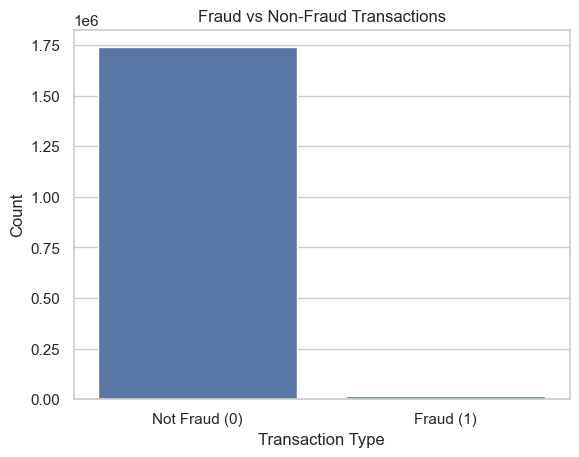

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64


In [5]:
# Cell 4: Fraud vs. Non-Fraud Count
sns.countplot(data=df_all, x="TX_FRAUD")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0, 1], ["Not Fraud (0)", "Fraud (1)"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

# Print counts
print(df_all["TX_FRAUD"].value_counts())


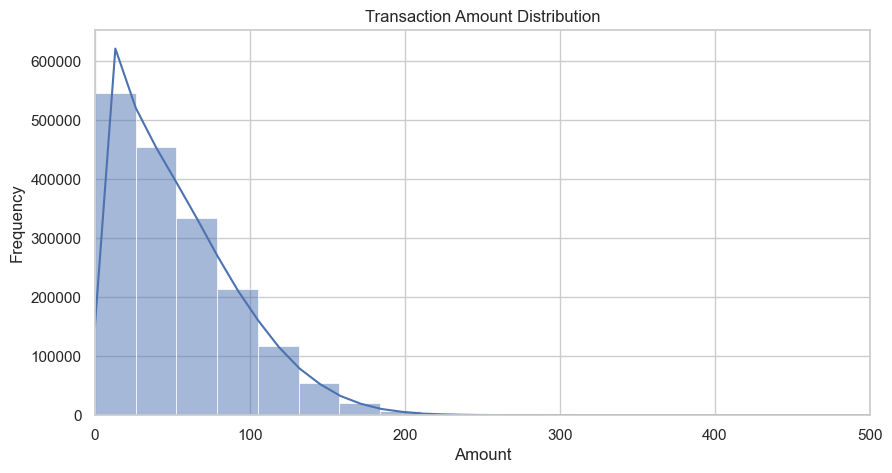

In [6]:
# Cell 5: Transaction Amount Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_all["TX_AMOUNT"], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, 500)  # zoom in to avoid long tail
plt.show()


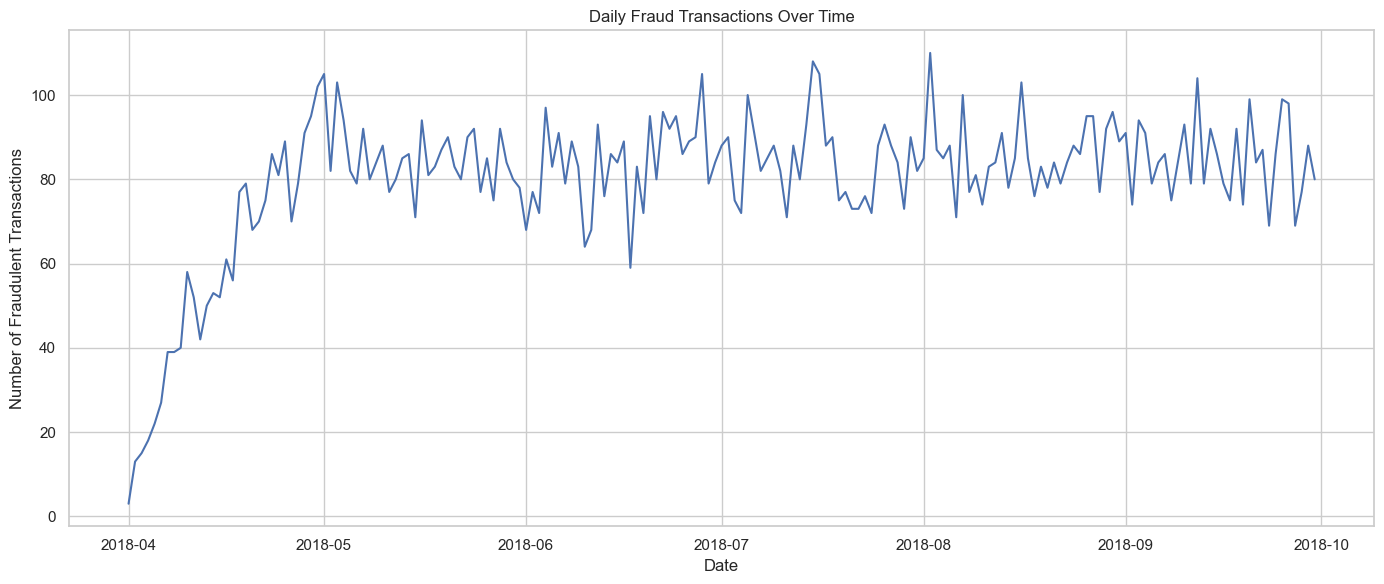

In [7]:
# Cell 6: Fraud Over Time
df_all['TX_DATE'] = df_all['TX_DATETIME'].dt.date
daily_fraud = df_all.groupby("TX_DATE")["TX_FRAUD"].sum()

plt.figure(figsize=(14,6))
daily_fraud.plot()
plt.title("Daily Fraud Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Fraudulent Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()


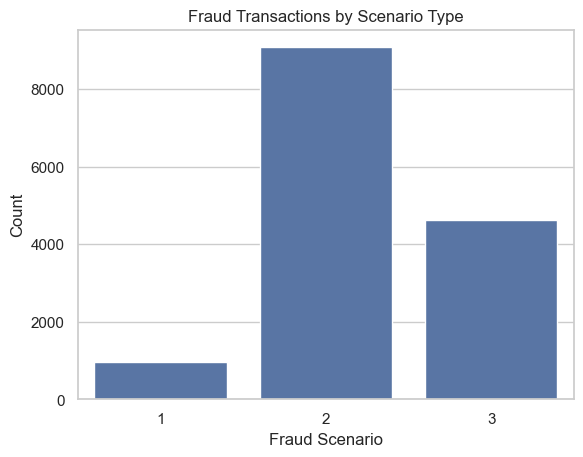

TX_FRAUD_SCENARIO
0    1739474
2       9077
3       4631
1        973
Name: count, dtype: int64

In [8]:
# Cell 7: Fraud by Scenario Type
sns.countplot(data=df_all[df_all["TX_FRAUD"] == 1], x="TX_FRAUD_SCENARIO")
plt.title("Fraud Transactions by Scenario Type")
plt.xlabel("Fraud Scenario")
plt.ylabel("Count")
plt.show()

# Optional: check scenario values
df_all["TX_FRAUD_SCENARIO"].value_counts()


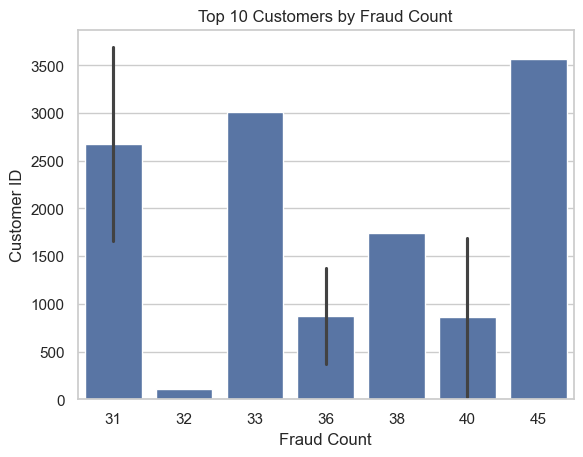

In [9]:
# Cell 8: Top 10 Customers with Most Fraud Transactions
top_customers = df_all[df_all["TX_FRAUD"] == 1]["CUSTOMER_ID"].value_counts().head(10)
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Fraud Count")
plt.xlabel("Fraud Count")
plt.ylabel("Customer ID")
plt.show()


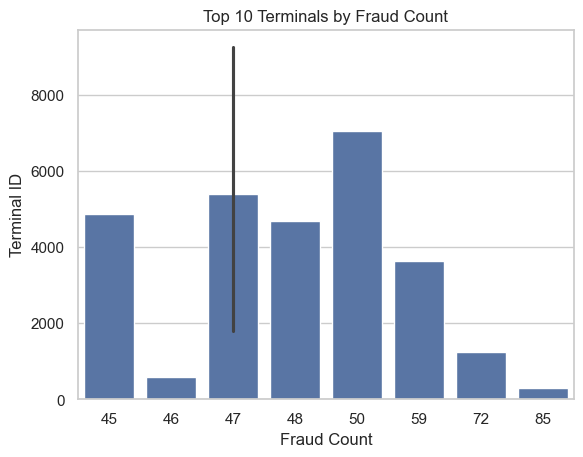

In [10]:
# Cell 9: Top 10 Terminals with Most Fraud Transactions
top_terminals = df_all[df_all["TX_FRAUD"] == 1]["TERMINAL_ID"].value_counts().head(10)
sns.barplot(x=top_terminals.values, y=top_terminals.index)
plt.title("Top 10 Terminals by Fraud Count")
plt.xlabel("Fraud Count")
plt.ylabel("Terminal ID")
plt.show()
